In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../..")

print('Current location: ', os.getcwd())

Current location:  c:\RAI\latest\fairness-variance


# Visualizations

In [4]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_group_models_box_plot_per_test_set, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'eq_odds_postprocessing'
DATASET_NAME = 'Folktables_GA_2018_Income'
EXPERIMENT_SESSION_UUID = "5bf56fd0-9616-4321-89af-73cefccb9c89"
SENSITIVE_ATTRS = ['SEX', "RAC1P", "SEX&RAC1P"]
MODEL_NAMES = ['RandomForestClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(150, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(5)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,SEX&RAC1P_priv_correct,SEX&RAC1P_priv_incorrect,SEX_dis,SEX_dis_correct,SEX_dis_incorrect,SEX_priv,SEX_priv_correct,SEX_priv_incorrect,overall,Test_Set_Index
0,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-20 16:18:06.495,5bf56fd0-9616-4321-89af-73cefccb9c89,Exp_iter_1,100,...,NaN,NaN,0.815278,NaN,NaN,0.791026,NaN,NaN,0.802667,0
1,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-20 16:22:36.963,5bf56fd0-9616-4321-89af-73cefccb9c89,Exp_iter_4,400,...,NaN,NaN,0.837466,NaN,NaN,0.790698,NaN,NaN,0.813333,0
2,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-20 16:22:41.300,5bf56fd0-9616-4321-89af-73cefccb9c89,Exp_iter_5,500,...,NaN,NaN,0.814419,NaN,NaN,0.790945,NaN,NaN,0.802667,0
3,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-20 16:23:06.109,5bf56fd0-9616-4321-89af-73cefccb9c89,Exp_iter_3,300,...,NaN,NaN,0.799447,NaN,NaN,0.772201,NaN,NaN,0.785333,0
4,Accuracy,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",Folktables_GA_2018_Income,200,OK,2023-11-20 16:23:38.721,5bf56fd0-9616-4321-89af-73cefccb9c89,Exp_iter_2,200,...,NaN,NaN,0.828061,NaN,NaN,0.795602,NaN,NaN,0.811333,0


In [11]:
df = models_metrics_dct[list(models_metrics_dct.keys())[0]]
df[(df.Metric == 'Accuracy') & (df.Experiment_Iteration == 'Exp_iter_1')].T

,0,5
Metric,Accuracy,Accuracy
Model_Name,RandomForestClassifier,RandomForestClassifier
Model_Params,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
Dataset_Name,Folktables_GA_2018_Income,Folktables_GA_2018_Income
Num_Estimators,200,200
Tag,OK,OK
Record_Create_Date_Time,2023-11-20 16:18:06.495000,2023-11-20 16:36:00.210000
Session_Uuid,5bf56fd0-9616-4321-89af-73cefccb9c89,5bf56fd0-9616-4321-89af-73cefccb9c89
Experiment_Iteration,Exp_iter_1,Exp_iter_1
Dataset_Split_Seed,100,100


In [12]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [13]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [14]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [15]:
test_df = melted_all_subgroup_metrics_per_model_dct["RandomForestClassifier"]
test_df[(test_df['Metric'] == 'Label_Stability') & (test_df['Intervention_Param'] == 1) & (test_df["Subgroup"] == 'overall')][["Metric", "Experiment_Iteration", "Metric_Value"]]

,Metric,Experiment_Iteration,Metric_Value
221,Label_Stability,Exp_iter_1,0.997833
221,Label_Stability,Exp_iter_4,0.999060
221,Label_Stability,Exp_iter_5,0.998787
221,Label_Stability,Exp_iter_3,0.998473
221,Label_Stability,Exp_iter_2,0.998647


In [16]:
test_df = melted_all_subgroup_metrics_per_model_dct["RandomForestClassifier"]
test_df[(test_df['Metric'] == 'Label_Stability') & (test_df['Intervention_Param'] == 0) & (test_df["Subgroup"] == 'overall')][["Metric", "Experiment_Iteration", "Metric_Value"]]

,Metric,Experiment_Iteration,Metric_Value
331,Label_Stability,Exp_iter_1,0.897120
331,Label_Stability,Exp_iter_4,0.909567
331,Label_Stability,Exp_iter_5,0.903213
331,Label_Stability,Exp_iter_3,0.904693
331,Label_Stability,Exp_iter_2,0.897827


In [17]:
melted_all_subgroup_metrics_per_model_dct['RandomForestClassifier']["Intervention_Param"]= melted_all_subgroup_metrics_per_model_dct['RandomForestClassifier']["Intervention_Param"].astype(bool)

<Figure size 1200x600 with 0 Axes>

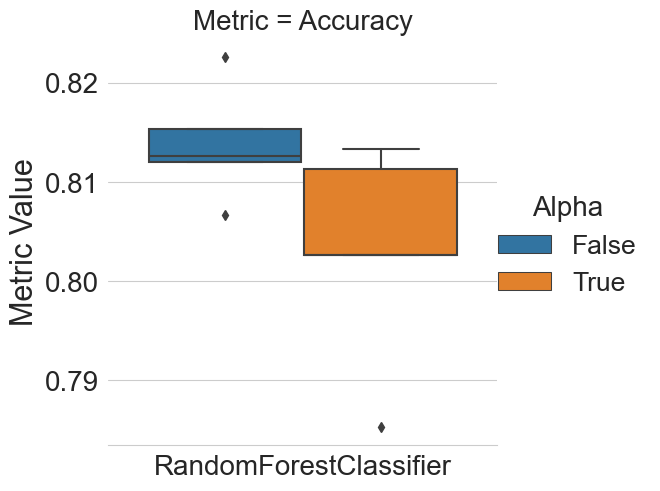

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.8, 0.84),
                                           metric_names=['Accuracy'],
                                           )

<Figure size 1200x600 with 0 Axes>

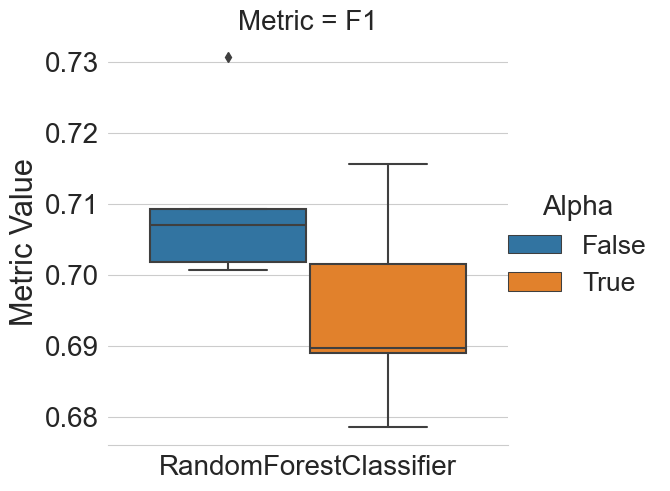

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.40, 0.525),
                                           metric_names=['F1'],
                                           )

<Figure size 1200x600 with 0 Axes>

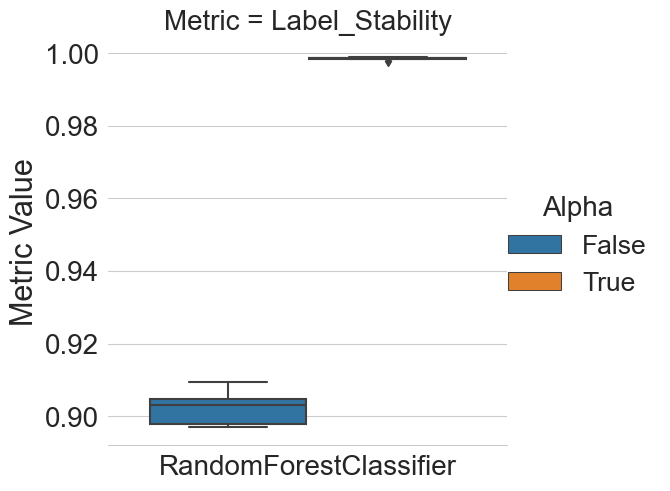

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.925, 1.005),
                                           metric_names=['Label_Stability'])

<Figure size 1200x600 with 0 Axes>

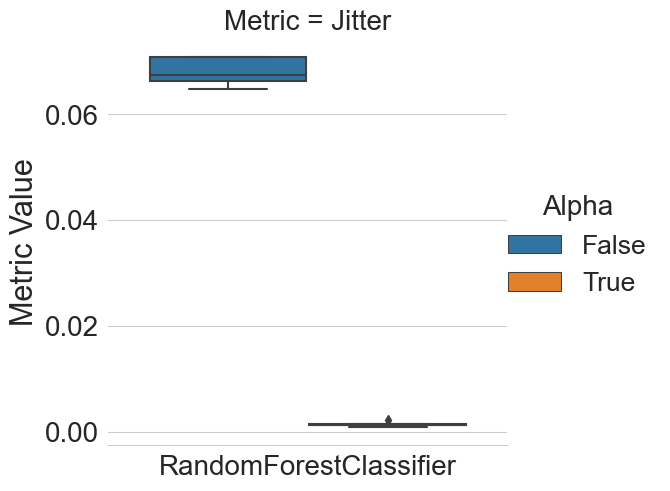

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           #ylim=(0.925, 1.005),
                                           metric_names=['Jitter'])

<Figure size 1200x600 with 0 Axes>

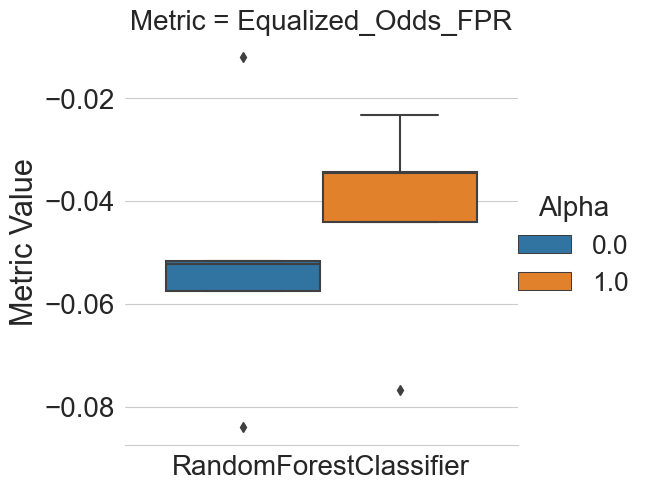

In [22]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Equalized_Odds_FPR'])

<Figure size 1200x600 with 0 Axes>

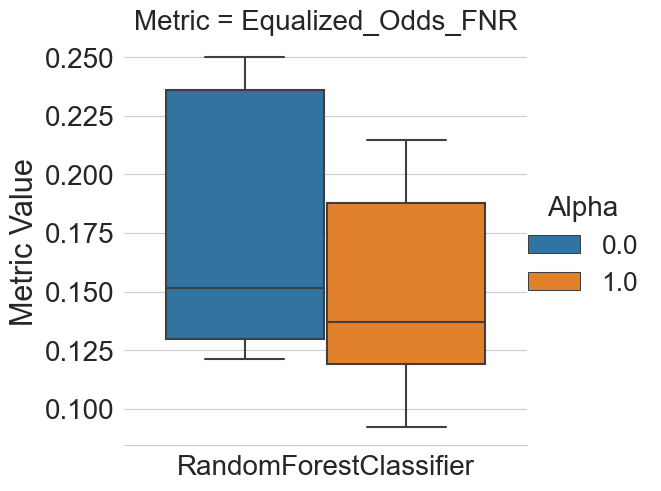

In [23]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Equalized_Odds_FNR'])

<Figure size 1200x600 with 0 Axes>

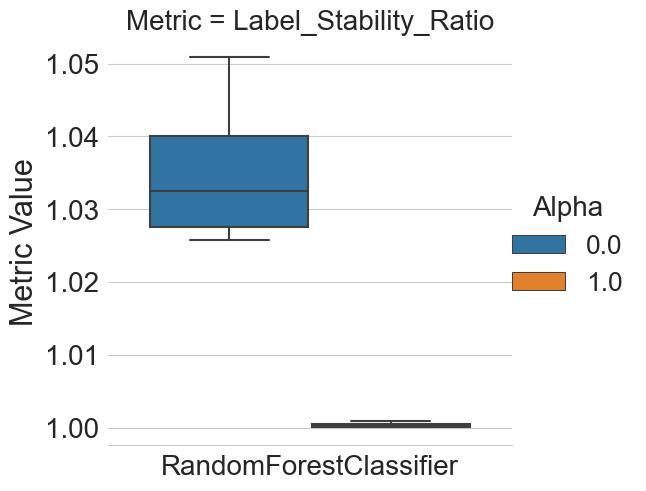

In [24]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='SEX&RAC1P',
                                           metric_names=['Label_Stability_Ratio'])